# Day and Night Classification


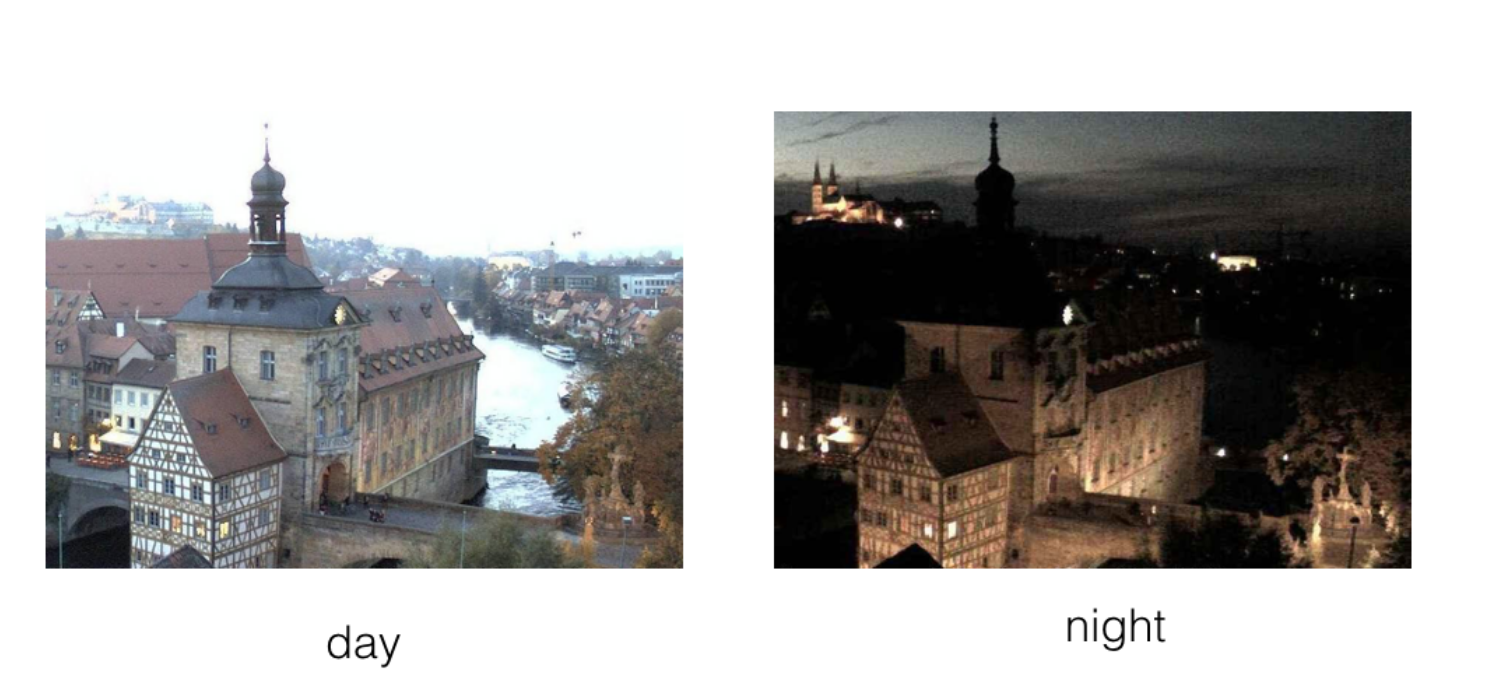

### Labeled Data and Accuracy

#### Why do we need labels?
A classifier takes in an image as input and should output a `predicted_label` that tells us the predicted class of that 
#### Accuracy
After looking at many images, the accuracy of a classifier is defined as the number of correctly classified images (for which the predicted_label matches the true label) divided by the total number of images
#### Numerical labels
It’s good practice to use numerical labels instead of strings or categorical labels. They're easier to track and compare. 

#### Distinguishing and Measurable Traits

There are lots of measurable traits that distinguish these images, and these measurable traits are referred to as` features`.

day images are much brighter, generally, than night images. 

#### we need to Standardizing Output
#### Numerical vs. Categorical
A "color" variable with the values: "red," "green," and "blue."
##### Integer Encoding
day = 1 and night = 0
##### One-hot Encoding
One-hot encoding is often used when there are more than 2 values to separate
three classes "red," "green," and "blue." we can make a list in that order: [red,green ,blue]. `In general, order does not matter.`  to represent `green  [0, 1, 0]`

The day/night image dataset consists of 200 RGB color images in two categories: day and night. There are equal numbers of each example: 100 day images and 100 night images.

We'd like to build a classifier that can accurately label these images as day or night, and that relies on finding distinguishing features between the two types of images!

Note: All images come from the AMOS dataset (Archive of Many Outdoor Scenes).

In [17]:
import cv2
import numpy as np
import os 
import matplotlib.pyplot as plt
%matplotlib inline

In [18]:
path='D:/AI epclon/udacity CV/Udacity - Computer Vision Nanodegree/Udacity - Computer Vision Nanodegree nd891 v1.0.0/NoteBook/day_night'

In [19]:
filesname=os.listdir(path)
print(filesname)

['day', 'night']


In [34]:
list_img=[]
lable=0
for i in filesname:
    img_path=path+'/'+ i
    for img in os.listdir(img_path):
        list_img.append([cv2.imread(img_path+'/'+img),lable])
    lable+=1

D:/AI epclon/udacity CV/Udacity - Computer Vision Nanodegree/Udacity - Computer Vision Nanodegree nd891 v1.0.0/NoteBook/day_night/day
D:/AI epclon/udacity CV/Udacity - Computer Vision Nanodegree/Udacity - Computer Vision Nanodegree nd891 v1.0.0/NoteBook/day_night/night


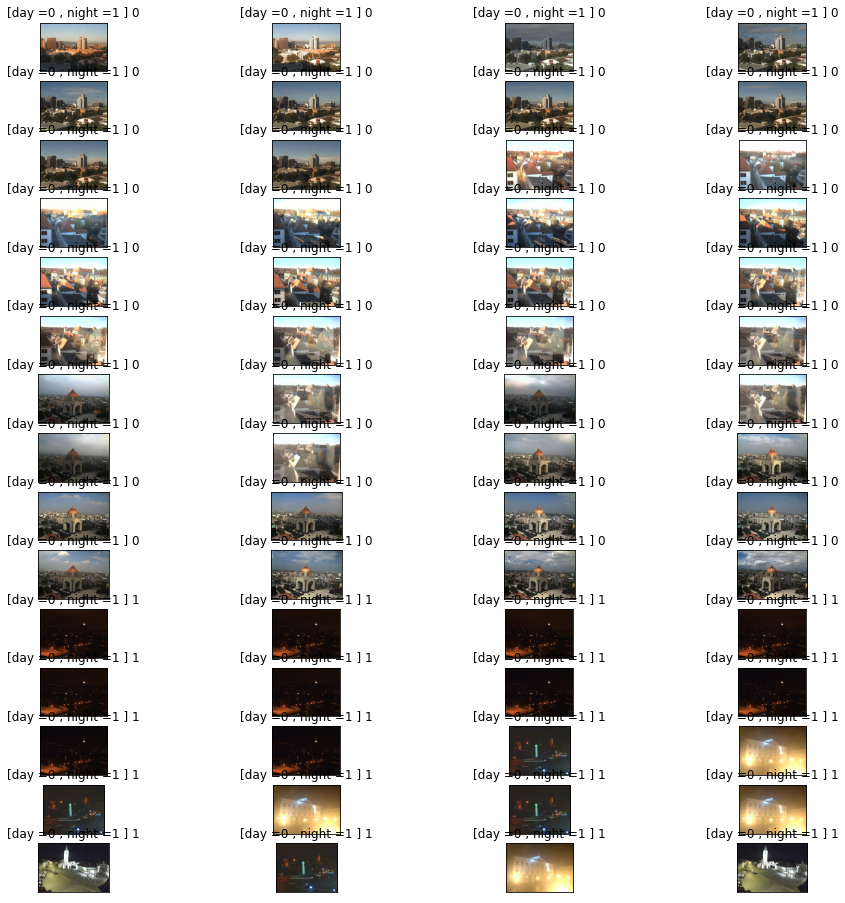

In [39]:
for i in range(len(list_img)):
    list_img[i][0]=cv2.cvtColor(list_img[i][0],cv2.COLOR_BGR2RGB)
fig = plt.figure(figsize=(16,16))
for i in range(len(list_img)):
    ax = fig.add_subplot(15, 4, i + 1, xticks=[], yticks=[])
    ax.set_title('[day =0 , night =1 ] '+ str(list_img[i][1] ))
    plt.imshow(list_img[i][0])
    if i==59:
        break

In [58]:
new_path=r'D:\AI epclon\udacity CV\Udacity - Computer Vision Nanodegree\Udacity - Computer Vision Nanodegree nd891 v1.0.0\NoteBook\DNIM\DNIM\Image'

In [59]:
new_filesname=os.listdir(new_path)
print(new_filesname)

['00000850', '00001323', '00003548', '00003837', '00004232', '00004368', '00005381', '00008575', '00009291', '00009320', '00009403', '00010888', '00011160', '00011331', '00019607', '00021510', '00023966']


In [60]:
all_img=[] # [[image1, lable1], [image2 ,lable2]]
lable=0
for i in new_filesname:
    img_path=new_path+'/'+ i # folder 
    for img in os.listdir(img_path):
        hour=int(img.split('_')[1][0:4])#20151101_025509 ...  [ '20151101', '025509'] 25509
        if(hour >535 and hour < 1635):
            all_img.append([cv2.imread(img_path+'/'+img),0]) # day =0
        else :
             all_img.append([cv2.imread(img_path+'/'+img),1]) #neight = 1


In [78]:
print(len(all_img))
random_list=np.random.randint(0,len(all_img),70)
print(random_list)

1641
[ 146  836  628  237  445 1308 1607 1109  498 1269  171  964 1073  401
 1072 1099 1233  394  771  681  427  516  354 1190 1268 1270  827 1228
  429 1632 1333  146 1285 1620  597 1353  867  656  696   49 1277 1422
 1482   25  702 1162  813  699 1049 1273  583 1481 1497  381 1513 1343
  909 1454  639  162  728   85 1576 1592 1295 1335  398  520  604 1145]


In [81]:
for i in range(len(all_img)):
    all_img[i][0]=cv2.cvtColor(all_img[i][0],cv2.COLOR_BGR2RGB)


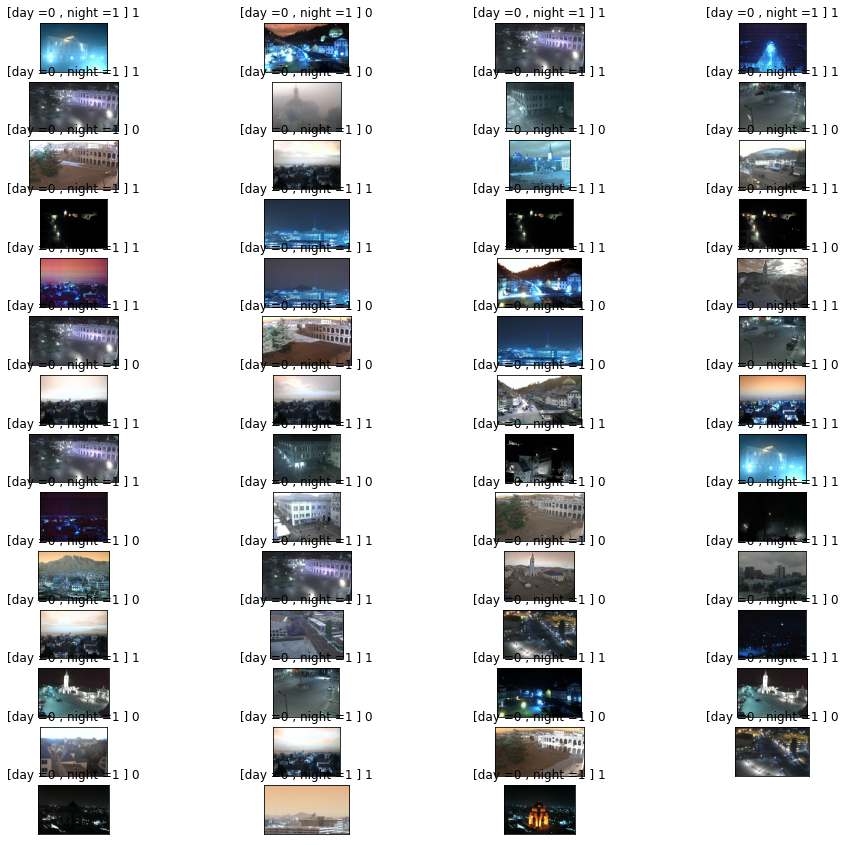

In [80]:
fig = plt.figure(figsize=(16,16))
index=1
for i in random_list:
    ax = fig.add_subplot(15, 4, index , xticks=[], yticks=[])
    ax.set_title('[day =0 , night =1 ] '+ str(all_img[i][1] ))
    plt.imshow(all_img[i][0])
    index +=1
    if index == 56:
        break
        

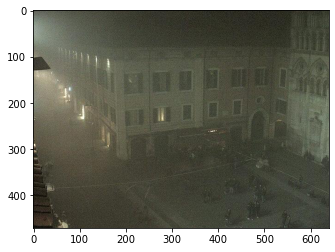

In [83]:
plt.imshow(all_img[i][0])

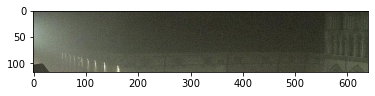

In [86]:
rgb_image = all_img[i][0][:all_img[i][0].shape[0]//4,:,:] # image[:, :, :]
plt.imshow(rgb_image)

In [89]:
def avr_bright(img):
    img=cv2.resize(img,(1000,600)) #resize to (width = 1000 , height = 600)
        #select image top part (sky)
    upper_part_image = img[:img.shape[0]//4,:,:]     # note img.shape[0] return height , so we divide height to 4 and select top part 
    #convert to HSV image 
    hsv_img=cv2.cvtColor(upper_part_image,cv2.COLOR_RGB2HSV)
    brightness=np.sum(hsv_img[:,:,2])   # sum value channle
    total_size =1000*(600//4)  # total size of upper part 
    avrg_brightness =brightness/total_size
    return  avrg_brightness
    

169.15440666666666


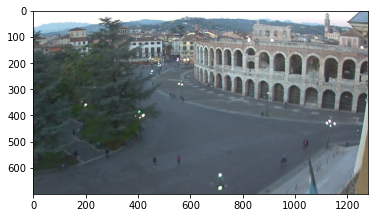

In [95]:
print(avr_bright(all_img[597 ][0]))
plt.imshow(all_img[597][0]);

1.25468


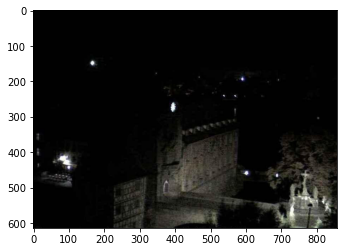

In [96]:
print(avr_bright(all_img[1295 ][0]))
plt.imshow(all_img[1295][0]);

# classifer 

In [111]:
def predicted_lable(img):
    threshold=102
    avg=avr_bright(img)
    if avg> threshold: # means day image 
        predict_lable= 0
    else :
        predict_lable= 1
    return predict_lable
    

### test data set 

In [127]:
print(len(all_img)//8)
test_data_indexs=np.random.randint(0,len(all_img),len(all_img)//8)

205


In [128]:
miss_classified_img=[]

for index in test_data_indexs:
        image=all_img[index][0]
        true_lable=all_img[index][1]
        predict_lable =predicted_lable(image)
        if predict_lable != true_lable:
            miss_classified_img.append([image,true_lable,predict_lable]) #[[image1 , true_lable1, predict_lable1], [image1 , true_lable1, predict_lable1]]

# test acuraccy

In [129]:
accuracy =len(miss_classified_img)/len(test_data_indexs)
print('accuracy =  ' + str(accuracy))

accuracy =  0.13658536585365855


Text(0.5, 1.0, 'true lable = 1   predicted= 0')

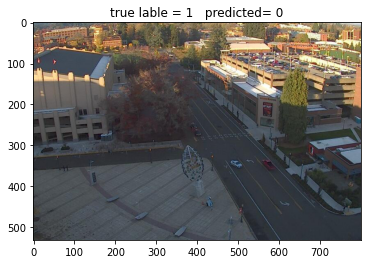

In [130]:
# show one if the miss classified images 
plt.imshow(miss_classified_img[0][0])
plt.title('true lable = '+ str(miss_classified_img[0][1])+ '   predicted= ' + str(miss_classified_img[0][2]))
